In [54]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [2]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [55]:
img=cv2.imread("/Users/zhuzhiwen/Downloads/Unit07/data/bird.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

## 1-1. cluster with only RGB values

In [14]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

In [56]:
def km_clust(array,n_clusters):
    k_m=KMeans(n_clusters=n_clusters)
    k_m.fit(array)
    center=k_m.cluster_centers_
    label=k_m.labels_
    return(label,center)
    

In [59]:
center

array([[163, 197, 120],
       [107,  95,  71]], dtype=uint8)

/Users/zhuzhiwen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


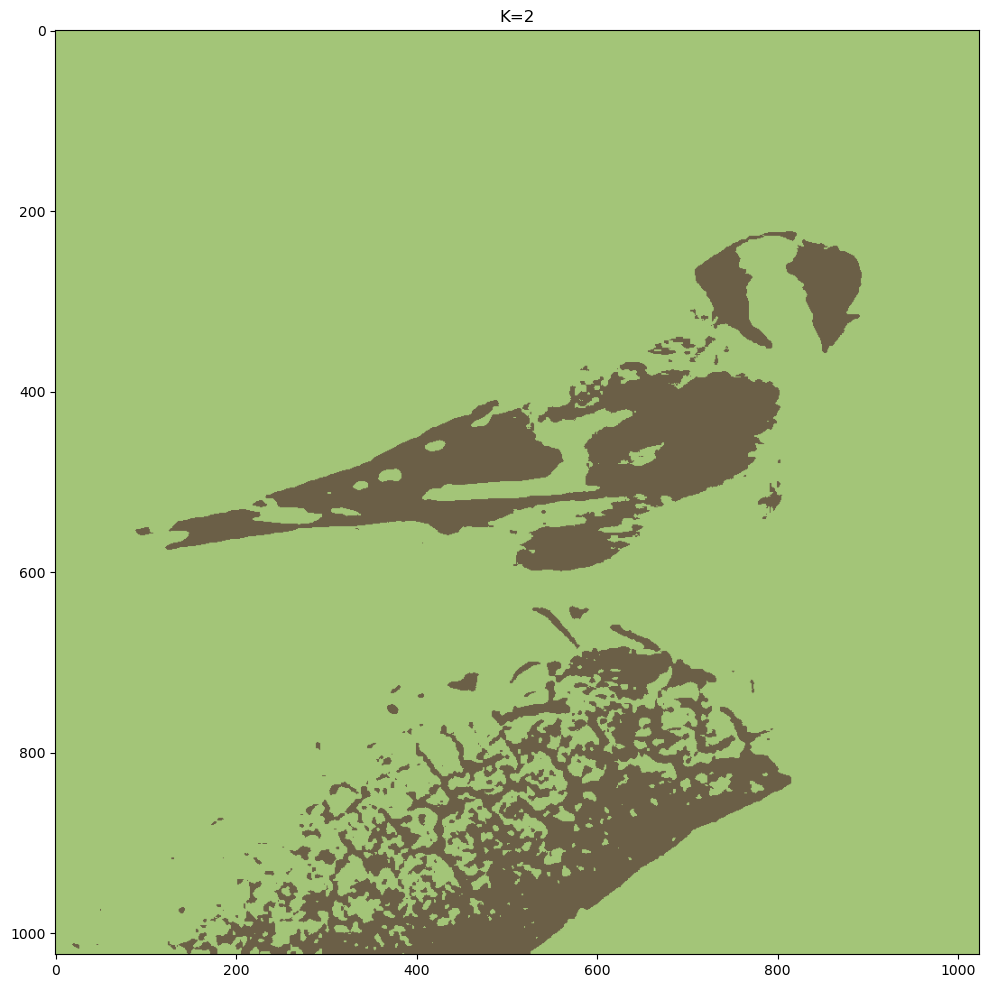

In [62]:
h,w,c=img.shape
Z=img.reshape((-1,3))
K=2
label,center=km_clust(Z,K)
center=np.uint8(center[:,:])
res=center[label.flatten()]
res=res.reshape(img.shape)
plt.figure(figsize=(16,12))

plt.title("K={}".format(K))
plt.imshow(res)



In [49]:
label

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [46]:
img.shape

(1024, 1024, 3)

In [37]:
res=center[label.flatten()]
res=res.reshape
res

<function ndarray.reshape>

In [33]:
center[label]

array([[163, 197, 120],
       [163, 197, 120],
       [163, 197, 120],
       ...,
       [163, 197, 120],
       [163, 197, 120],
       [163, 197, 120]], dtype=uint8)

In [118]:
import numpy as np

# 创建一个二维数组
arr = np.array([[1, 2, 3], [4, 5, 6]])

# 将数组重新形状为 (3, 2)
new_arr = arr.reshape((-1,1))
new_arr


array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [131]:
arr=np.array([[1,2,3],[4,5,6]])
new_arr=arr.reshape(3,2)
new_arr

array([[1, 2],
       [3, 4],
       [5, 6]])

In [23]:
)

(1048576,)

In [134]:
print(Z)

[[1.290e+02 1.750e+02 1.000e+02 0.000e+00 0.000e+00]
 [1.290e+02 1.750e+02 1.000e+02 0.000e+00 1.000e+00]
 [1.290e+02 1.750e+02 1.000e+02 0.000e+00 2.000e+00]
 ...
 [1.530e+02 2.070e+02 1.090e+02 1.023e+03 1.021e+03]
 [1.530e+02 2.070e+02 1.090e+02 1.023e+03 1.022e+03]
 [1.530e+02 2.070e+02 1.090e+02 1.023e+03 1.023e+03]]


## 1-2. cluster with RGB values and the location

/Users/zhuzhiwen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zhuzhiwen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zhuzhiwen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zhuzhiwen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

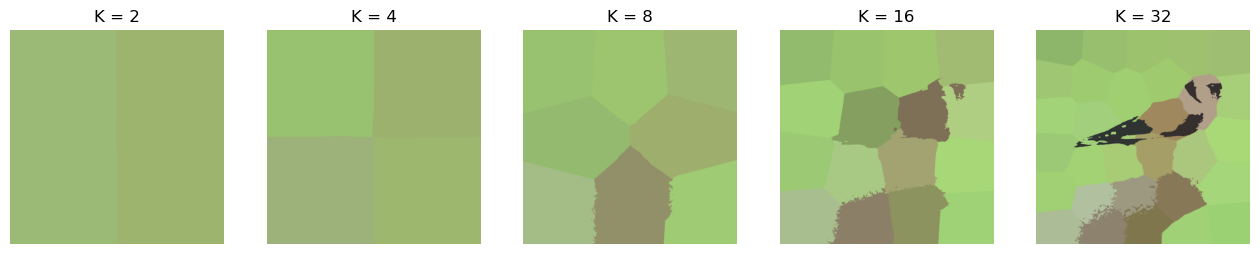

In [133]:
h, w, c = img.shape

#Added location feature
Z = np.ones((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

In [138]:
center[label]

array([[141, 182, 107],
       [141, 182, 107],
       [141, 182, 107],
       ...,
       [156, 209, 115],
       [156, 209, 115],
       [156, 209, 115]], dtype=uint8)

/Users/zhuzhiwen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zhuzhiwen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zhuzhiwen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zhuzhiwen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

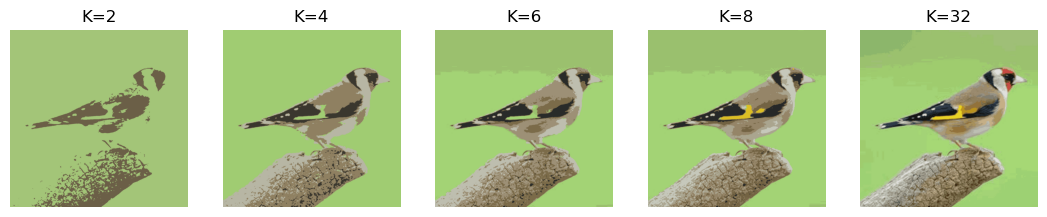

In [162]:
h,w,c=img.shape
Z=np.zeros((h,w,c+2))
for h in range(len(img)):
    for w in range(len(img)):
        Z[h][w]=np.append(img[h][w],[[h/100],[w/100]])
Z=Z.reshape(-1,5)

Ks=[2,4,6,8,32]
plt.figure(figsize=(16,12))

for i,K in enumerate(Ks):
    label,center=km_clust(Z,K)
    
    center=np.uint8(center[:,:3])
    res=center[label.flatten()]
    
    res=res.reshape((img.shape))
    
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.title("K={}".format(K))
    plt.imshow(res)
plt.show()           
        

In [141]:
Z[h][w] = np.append(img[h][w], [[h], [w]])

IndexError: index 1023 is out of bounds for axis 0 with size 5

In [157]:
center[:,:3]

array([[162, 207, 118],
       [173, 212, 122],
       [165, 158, 103],
       [158, 193, 112],
       [176, 194, 155],
       [155, 209, 114],
       [150, 190, 110],
       [161, 209, 119],
       [160, 208, 115],
       [171, 199, 126],
       [158, 190, 115],
       [156, 203, 119],
       [159, 204, 108],
       [162, 209, 122],
       [166, 213, 124],
       [ 57,  51,  49],
       [143, 184, 108],
       [171, 190, 148],
       [128, 117,  78],
       [165, 198, 118],
       [156, 193, 109],
       [158, 136,  94],
       [ 47,  53,  51],
       [156, 152, 126],
       [167, 218, 117],
       [167, 204, 118],
       [172, 164, 133],
       [134, 120,  87],
       [158, 202, 112],
       [162, 209, 118],
       [141, 131, 112],
       [161, 208, 114]], dtype=uint8)

In [150]:
label[10:
    ]

array([16, 16, 16, ..., 10, 10, 10], dtype=int32)

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

In [77]:
print(Z)

[[1.290e+02 1.750e+02 1.000e+02 0.000e+00 0.000e+00]
 [1.290e+02 1.750e+02 1.000e+02 0.000e+00 1.000e+00]
 [1.290e+02 1.750e+02 1.000e+02 0.000e+00 2.000e+00]
 ...
 [1.530e+02 2.070e+02 1.090e+02 1.023e+03 1.021e+03]
 [1.530e+02 2.070e+02 1.090e+02 1.023e+03 1.022e+03]
 [1.530e+02 2.070e+02 1.090e+02 1.023e+03 1.023e+03]]


In [88]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img)):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

In [89]:
print(Z)

[[1.290e+02 1.750e+02 1.000e+02 0.000e+00 0.000e+00]
 [1.290e+02 1.750e+02 1.000e+02 0.000e+00 1.000e+00]
 [1.290e+02 1.750e+02 1.000e+02 0.000e+00 2.000e+00]
 ...
 [1.530e+02 2.070e+02 1.090e+02 1.023e+03 1.021e+03]
 [1.530e+02 2.070e+02 1.090e+02 1.023e+03 1.022e+03]
 [1.530e+02 2.070e+02 1.090e+02 1.023e+03 1.023e+03]]


In [90]:
Z[h][w]

IndexError: index 1023 is out of bounds for axis 0 with size 5